In [9]:
import tensorflow as tf

In [10]:
# prepare normalisation
from sklearn.preprocessing import StandardScaler
from math import sqrt

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData
    

In [11]:
# load some data (for a regression)
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

# print(dataset['feature_names'])
# print(dataset['target'])
# print(dataset['data'])

inputs, outputs = shuffle(dataset.data, dataset.target)

# prepare data for training and testing
trainSize = int(0.8 * len(inputs))
trainInputs = inputs[:trainSize]
trainOutputs = outputs[:trainSize]

testInputs = inputs[trainSize:]
testOutputs = outputs[trainSize:]

# data normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainInputs)
trainInputs = scaler.transform(trainInputs)
testInputs = scaler.transform(testInputs)



In [12]:
# create an ANN
model = tf.keras.Sequential([
  tf.keras.layers.Dense(6, input_dim = len(trainInputs[0]), activation = tf.nn.relu),
  tf.keras.layers.Dense(4, activation = tf.nn.relu),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

opt1 = tf.keras.optimizers.SGD()
# opt2 = tf.keras.optimizers.Adam(lr=0.001, decay=0.001)

# model.compile(optimizer=opt1,
#                loss = tf.keras.losses.MeanSquaredError(),
#                metrics=[tf.keras.metrics.MeanSquaredError()])

model.compile(optimizer=opt1,
               loss = tf.keras.losses.MeanAbsolutePercentageError(),
               metrics = [tf.keras.metrics.MeanAbsolutePercentageError()])
model.summary()

# train the ANN
print('# Fit model on training data ')
history = model.fit(trainInputs, trainOutputs, batch_size=5, epochs=10)
print('\nhistory dict:', history.history)


C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99 (396.00 B)

 Trainable params: 99 (396.00 B)

 Non-trainable params: 0 (0.00 B)

# Fit model on training data 
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.4534 - mean_absolute_percentage_error: 99.4534
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.3007 - mean_absolute_percentage_error: 99.3007
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.1709 - mean_absolute_percentage_error: 99.1709
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.1280 - mean_absolute_percentage_error: 99.1280
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.1442 - mean_absolute_percentage_error: 99.1442
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.1270 - mean_absolute_percentage_error: 99.1270
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.1157 - mean_absolute_percentage_error: 99.1157
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.0670 - mean_absolute_percentage_error: 99.0670
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.1633 - mean_absolute_percentage_error: 99.163

In [13]:
# test the ANN
testMetrics = model.evaluate(testInputs, testOutputs)

# or
# computedOutputs = model.predict(testInputs)
# err = sum([abs((testOutputs[i] - computedOutputs[i]) / testOutputs[i]) * 100 for i in range(len(testOutputs))]) / len(testOutputs)
# print(err)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 99.1738 - mean_absolute_percentage_error: 99.1738


In [14]:
# load some data (a classification problem)
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
irisDataset = load_iris()

# prepare the labels in 1-hot encoding
irisData, irisLabels = shuffle(irisDataset.data, irisDataset.target)
oneHotLabels = tf.keras.utils.to_categorical(irisLabels, 3)
irisLabels = oneHotLabels

# split the data in trianing and testing
trainSize = int(0.8 * len(irisData))
irisTrainData = irisData[:trainSize]
irisTrainLabels = irisLabels[:trainSize]

irisTestData = irisData[trainSize:]
irisTestLabels = irisLabels[trainSize:]

# data normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(irisTrainData)
irisTrainData = scaler.transform(irisTrainData)
irisTestData = scaler.transform(irisTestData)


In [15]:
# construct an ANN
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2, input_dim = 4, activation = tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax),
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
model.summary()

# train the ANN
print('# Fit model on training data ')
history = model.fit(irisTrainData, irisTrainLabels, batch_size=10, epochs=10)
print('\nhistory dict:', history.history)


C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

# Fit model on training data 
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4256 - loss: 1.1315 
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3631 - loss: 1.0594
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3510 - loss: 1.0105
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.9160
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7221 - loss: 0.8717
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6092 - loss: 0.8982
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7287 - loss: 0.7868 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 0.7895
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7284 - loss: 0.7506 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - loss: 0.7193  

history dict: {'accuracy': [0.3583333194255829, 0.3583333194255829, 0.4000000059604645, 0.6916666626930237, 0.6916666626930

In [16]:
# test the trained ANN
output = model.evaluate(irisTestData, irisTestLabels)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.6000 - loss: 0.7854


In [17]:
# try another architecture
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(2, input_dim = 4, activation = tf.nn.relu),
  tf.keras.layers.Dense(8, activation = tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax),
])

model2.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
history2 = model2.fit(irisTrainData, irisTrainLabels, batch_size=10, epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2865 - loss: 1.2687 
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1831 - loss: 1.2335.23
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3193 - loss: 1.1742
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3288 - loss: 1.1405
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3308 - loss: 1.0949
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3371 - loss: 1.0933
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4429 - loss: 1.0442
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4494 - loss: 1.0214
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4490 - loss: 1.0219 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4338 - loss: 1.0060


Text(0, 0.5, 'Loss & acc')

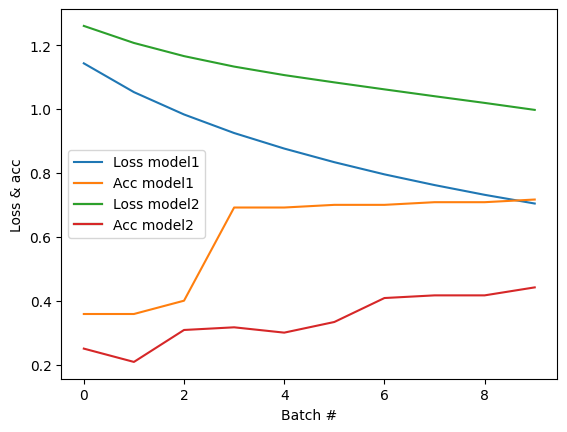

In [18]:
import matplotlib.pyplot as plt

loss1, = plt.plot(history.history['loss'], label = 'loss model1')
acc1, = plt.plot(history.history['accuracy'], label = 'acc model1')

loss2, = plt.plot(history2.history['loss'], label = 'loss model2')
acc2, = plt.plot(history2.history['accuracy'], label = 'acc model2')
plt.legend([loss1, (loss1, acc1), (loss1, acc1, loss2), (loss1, acc1, loss2, acc2)], ['Loss model1', 'Acc model1', 'Loss model2', 'Acc model2'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc')


In [19]:
print('performance of simple ANN ')
test_loss1, test_acc1 = model.evaluate(irisTestData, irisTestLabels, verbose=2)
print('performance of more complex ANN ')
test_loss2, test_acc2 = model2.evaluate(irisTestData, irisTestLabels, verbose=2)


performance of simple ANN 
1/1 - 0s - 28ms/step - accuracy: 0.6000 - loss: 0.7854
performance of more complex ANN 
1/1 - 0s - 227ms/step - accuracy: 0.4000 - loss: 1.0730


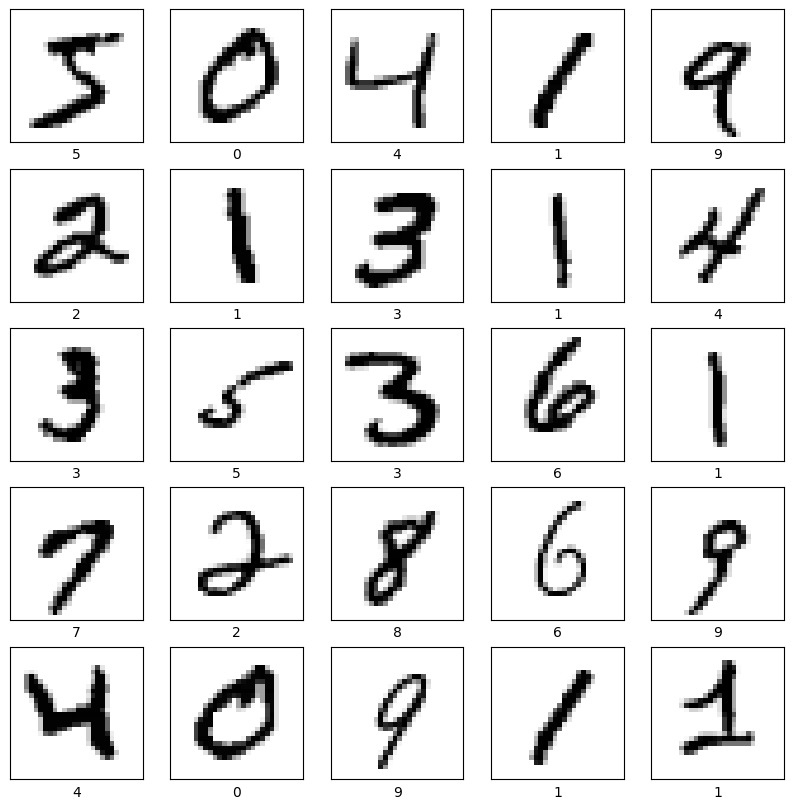

In [20]:
# CNN example

# load data
mnist = tf.keras.datasets.mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

# normalise
trainImages, testImages = trainImages / 255, testImages / 255

# transform labels into one-hot encoding
trainLabels1hot = tf.keras.utils.to_categorical(trainLabels, 10)
testLabels1hot = tf.keras.utils.to_categorical(testLabels, 10)


class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabels[i]])
plt.show()


In [21]:
modelANN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelANN.summary()

modelANN.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
historyANN = modelANN.fit(trainImages, trainLabels1hot, batch_size=128, epochs=3)

C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4620 - loss: 1.7883
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8615 - loss: 0.5566
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8894 - loss: 0.4059


In [22]:
# input image dimensions
# loaded mnist data are 28x28 images, but CNN requires new reshapes (28x28x1)
img_rows, img_cols = 28, 28
trainImages = trainImages.reshape(trainImages.shape[0], img_rows, img_cols, 1)
testImages = testImages.reshape(testImages.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

modelCNN = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10, activation='softmax')
])

modelCNN.summary()

modelCNN.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

historyCNN = modelCNN.fit(trainImages, trainLabels1hot, batch_size=128, epochs=3)

C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.5019 - loss: 1.5473
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.8556 - loss: 0.4719
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.8850 - loss: 0.3784


Text(0, 0.5, 'Loss & acc')

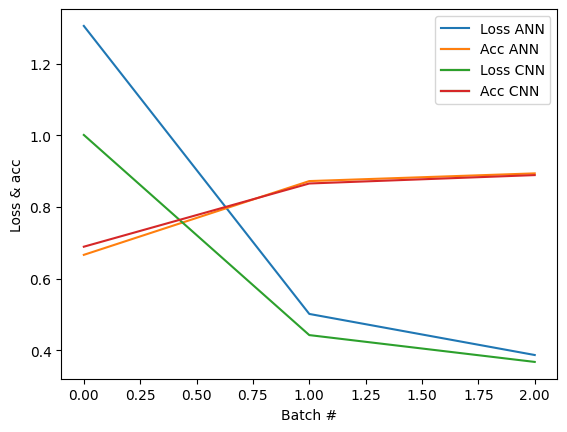

In [23]:
import matplotlib.pyplot as plt

loss1, = plt.plot(historyANN.history['loss'], label = 'loss ANN')
acc1, = plt.plot(historyANN.history['accuracy'], label = 'acc ANN')

loss2, = plt.plot(historyCNN.history['loss'], label = 'loss CNN')
acc2, = plt.plot(historyCNN.history['accuracy'], label = 'acc CNN')
plt.legend([loss1, (loss1, acc1), (loss1, acc1, loss2), (loss1, acc1, loss2, acc2)], ['Loss ANN', 'Acc ANN', 'Loss CNN', 'Acc CNN'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc')

In [24]:
# LeNet network

from sklearn.model_selection import train_test_split
trainImages, validImages, trainLabels1hot, validLabels1hot = train_test_split(
    trainImages, trainLabels1hot, test_size = 0.1, random_state=42)


# activationType = 'sigmoid'
activationType = 'relu'

# LeNet5 (activation = sigmoid)
modelLeNet = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=6, kernel_size=3, activation=activationType,
                               padding='same'),
  tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
  tf.keras.layers.Conv2D(filters=16, kernel_size=3,
                               activation=activationType),
  tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation=activationType),
  tf.keras.layers.Dense(84, activation=activationType),
  # tf.keras.layers.Dense(10)])  # a linear activation is not enough for classification problems
  tf.keras.layers.Dense(10, activation='softmax')])



modelLeNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

import math
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def step_decay(epoch):
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

print('# Fit model on training data ')
history = modelLeNet.fit(trainImages, trainLabels1hot, 
                    validation_data=(validImages, validLabels1hot), 
                    batch_size=128, epochs=3, 
                    callbacks=callbacks_list, 
                    verbose=1)
print('\nhistory dict:', history.history)

modelLeNet.summary()



# Fit model on training data 
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6737 - loss: 1.0347 - val_accuracy: 0.9522 - val_loss: 0.1633 - learning_rate: 0.1000
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9520 - loss: 0.1599 - val_accuracy: 0.9662 - val_loss: 0.1125 - learning_rate: 0.1000
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9725 - loss: 0.0919 - val_accuracy: 0.9750 - val_loss: 0.0858 - learning_rate: 0.0600

history dict: {'accuracy': [0.8360740542411804, 0.9566110968589783, 0.9721851944923401], 'loss': [0.5338726043701172, 0.1423579901456833, 0.09207858890295029], 'val_accuracy': [0.9521666765213013, 0.9661666750907898, 0.9750000238418579], 'val_loss': [0.1633157730102539, 0.11248291283845901, 0.08577705174684525], 'learning_rate': [0.10000000149011612, 0.10000000149011612, 0.05999999865889549]}


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,196 (317.18 KB)

 Trainable params: 81,194 (317.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

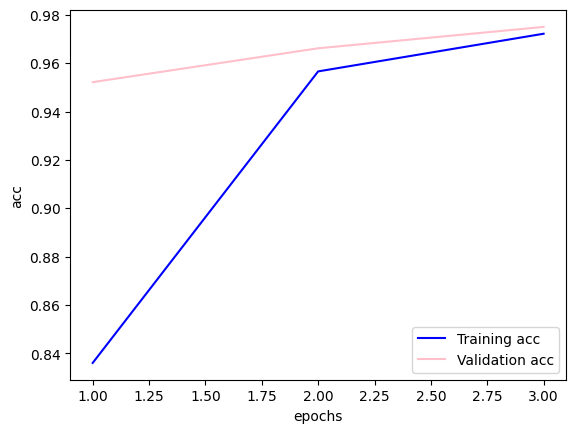

In [25]:
lossTrain = history.history['loss']
accTrain = history.history['accuracy']
lossValid = history.history['val_loss']
accValid = history.history['val_accuracy']

epochs = range(1, len(lossTrain) + 1)
plt.plot(epochs, accTrain, color = 'blue', label = 'Training acc')
plt.plot(epochs, accValid, color = 'pink', label = 'Validation acc')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()


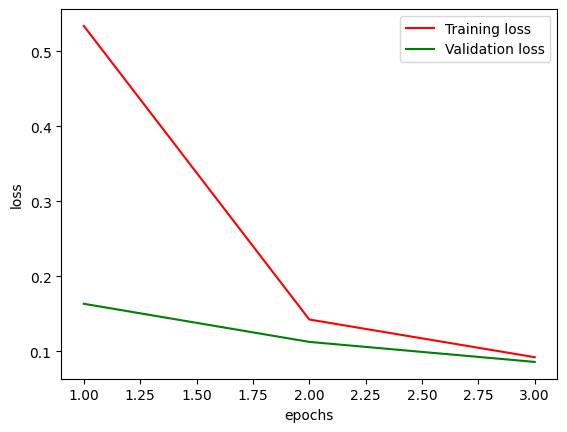

In [26]:
epochs = range(1, len(lossTrain) + 1)
plt.plot(epochs, lossTrain, color = 'red', label = 'Training loss')
plt.plot(epochs, lossValid, color = 'green', label = 'Validation loss')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [27]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(testLabels, np.argmax(modelLeNet.predict(testImages), axis=1)))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.95      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60 (240.00 B)

 Trainable params: 60 (240.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_41']. Received: the structure of inputs=*
  warnings.warn(


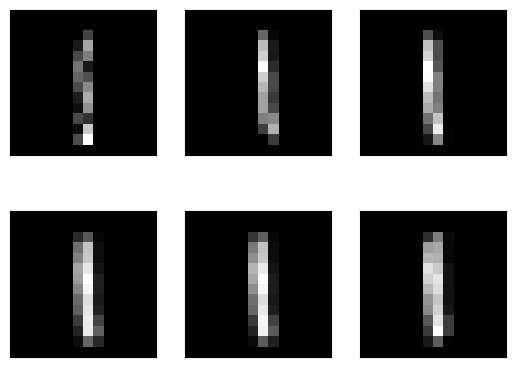

In [28]:
# visualise the feature maps
# http://www.iro.umontreal.ca/~lisa/publications2/index.php/publications/show/247
# https://cs231n.github.io/understanding-cnn/
from keras.models import Model
# redefine model to output right after the first hidden layer
model = Model(inputs=modelLeNet.inputs, outputs=modelLeNet.layers[1].output)
model.summary()
feature_maps = model.predict(trainImages[0].reshape(1, 28, 28, 1))
# plot all 6 maps (first conv layer has 6 filters) in 2x3 squares
ix = 1
for _ in range(2):
	for _ in range(3):		# specify subplot and turn of axis
		ax = plt.subplot(2, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])		
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray') # plot filter channel in grayscale
		ix += 1
plt.show() # show the figure

In [29]:
# TO DOs for a CNN

# Replace the average pooling with max pooling. What happens?

# Try to construct a more complex network based on LeNet to improve its accuracy.

# Adjust the convolution window size.

# Adjust the number of output channels.

# Adjust the activation function (e.g., ReLU).

# Adjust the number of convolution layers.

# Adjust the number of fully connected layers.

# Adjust the learning rates and other training details (e.g., initialization and number of epochs.)

